# Prediction of Student Scores Using Linear Regression

#### <span style='color: blue '> Name : Aditi Paretkar  </span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

###  <span style='color:red '> Getting a simple view of the data. It has 2 columns : Hours and Scores </span>

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.shape[0]

25

### <span style='color:green '> This shows that the relation between the number of hours and the score is almost linear in nature </span>

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

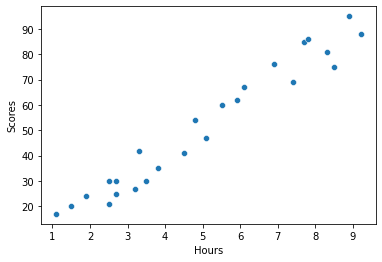

In [6]:
sns.scatterplot(x='Hours',y='Scores',data=df)

In [7]:
X=df[['Hours']]
y=df['Scores']
X

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


## Using Linear Regression to predict student scores.

In [8]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=101)

In [9]:
from sklearn.linear_model import LinearRegression

### <span style='color:purple '> Fitting a Linear Regression Model to the data </span>

In [10]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [11]:
predicted = lm.predict(X_test) #these are the predicted values

###  <span style='color: brown '> This is the relation between the predicted values and the actual values. As the values lie almost on a linear line (close to y=x line) we can say that the predictions were close to the actual values. </span>

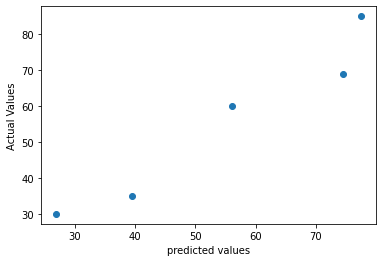

In [13]:
plt.scatter(predicted,y_test)
plt.xlabel('predicted values')
plt.ylabel('Actual Values')
plt.show()

In [14]:
predicted

array([26.84539693, 77.45859361, 39.4986961 , 74.53860149, 56.04531809])

### <span style='color: gold'> Checking the accuracy of our model </span>

In [15]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predicted))
print('MSE:', metrics.mean_squared_error(y_test, predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))

MAE: 4.937597792467705
MSE: 26.675642597052235
RMSE: 5.164846812544612


In [16]:
type(X_test)

pandas.core.frame.DataFrame

In [17]:
newarr = X_test['Hours']
newarr


16    2.5
10    7.7
22    3.8
19    7.4
7     5.5
Name: Hours, dtype: float64

In [18]:
lm.coef_ #this is the predicted correlation value that relates the hours to the scores.

array([9.73330705])

In [19]:
#to find the constant in y=mx+c

predicted[0]-lm.coef_*newarr[16]

array([2.5121293])

In [20]:
#if the student studies 9.25 hours a day: (using y=mx+c) predicted score would be
lm.coef_*9.25+predicted[0]-lm.coef_*newarr[16]

array([92.54521954])

###  <span style='color: pink '> To predict what would be the score if the student studied 9.25 hours a day?. </span>

In [21]:
inputarr =[[9.25]]
inputarr

[[9.25]]

In [22]:
lm.predict(inputarr)

array([92.54521954])